In [80]:
import networkx as nx
import networkit as nk
import pandas as pd

import utils
import matplotlib
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,5)

# Node Compression Simple Example

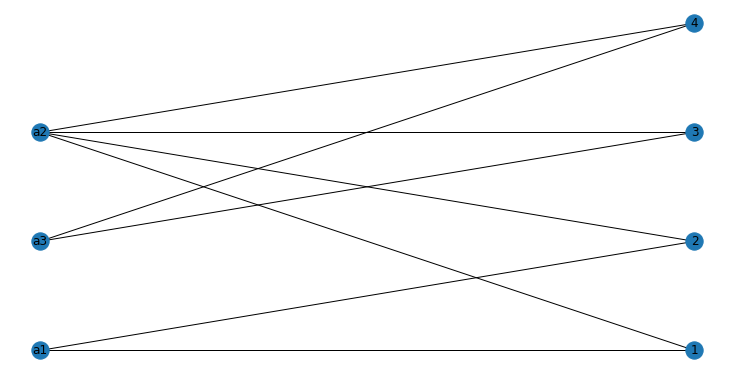

In [81]:
g = nx.Graph()
g.add_nodes_from(['a1', 'a2', 'a3'], bipartite=0, type='attr')
g.add_nodes_from([1, 2, 3, 4], bipartite=1, type='cell')
g.add_edges_from([(1,'a1'), (1,'a2'), (2,'a1'), (2,'a2'), (3,'a2'), (3,'a3'), (4,'a2'), (4,'a3')])

# Separate by group
l, r = nx.bipartite.sets(g)
pos = {}

# Update position for node from each group
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))

nx.draw(g, pos=pos, with_labels = True)
plt.show()

100%|██████████| 2/2 [00:00<00:00, 12300.01it/s]Constructing attr_nodes_set_to_cell_nodes dictionary...
Compressing cell nodes...



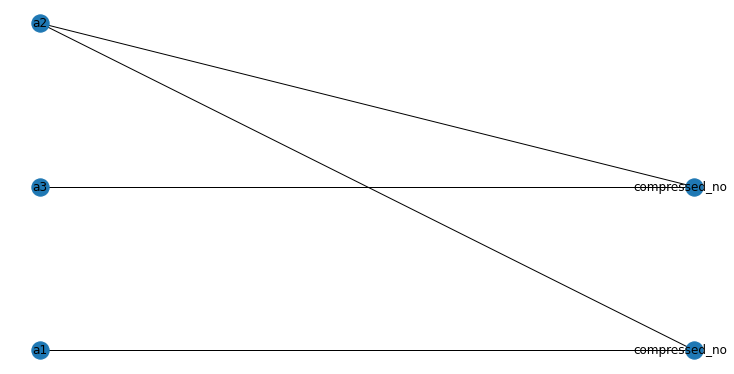

In [82]:
g_compressed, compressed_node_to_orig_nodes = utils.graph_collapsing.get_compressed_graph(g)
# Separate by group
l, r = nx.bipartite.sets(g_compressed)
pos = {}

# Update position for node from each group
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))

nx.draw(g_compressed, pos=pos, with_labels = True)
plt.show()

In [83]:
df = utils.betweenness.betweeness_exact_df(g, normalized=False, quiet=True)
df

,node,node_type,betweenness_centrality
0,a1,attr,1.0
1,a2,attr,20.0
2,a3,attr,1.0
3,1,cell,4.0
4,2,cell,4.0
5,3,cell,4.0
6,4,cell,4.0


In [84]:
ident_dict = dict.fromkeys(g_compressed, 1)
for node in compressed_node_to_orig_nodes:
    ident_dict[node] = len(compressed_node_to_orig_nodes[node])

bc_compressed =  utils.betweenness_custom.betweenness_centrality(g_compressed, normalized=False, ident=ident_dict)
bc_decompressed = utils.graph_collapsing.get_bc_scores_of_original_graph(compressed_graph_to_bc_score=bc_compressed, compressed_node_to_orig_nodes=compressed_node_to_orig_nodes)
df['bc_compressed'] = df['node'].map(bc_decompressed)

measures = ['betweenness_centrality', 'bc_compressed']
for measure in measures:
    df[measure+'_dense_rank'] = df[measure].rank(method='dense', ascending=False)
df

100%|██████████| 5/5 [00:00<00:00, 41445.69it/s]


,node,node_type,betweenness_centrality,bc_compressed,betweenness_centrality_dense_rank,bc_compressed_dense_rank
0,a1,attr,1.0,0.0,3.0,3.0
1,a2,attr,20.0,9.0,1.0,1.0
2,a3,attr,1.0,0.0,3.0,3.0
3,1,cell,4.0,2.0,2.0,2.0
4,2,cell,4.0,2.0,2.0,2.0
5,3,cell,4.0,2.0,2.0,2.0
6,4,cell,4.0,2.0,2.0,2.0


# Synthetic Example

In [85]:
g_path = '../graph_construction/combined_graphs_output/synthetic_benchmark_bipartite/bipartite/bipartite.graph'
g = pickle.load(open(g_path, 'rb'))

# Get compressed graph
g_compressed, compressed_node_to_orig_nodes = utils.graph_collapsing.get_compressed_graph(g)

print("Original graph has:", g.number_of_nodes(), 'nodes and', g.number_of_edges(), 'edges.')
print("Compressed graph has:", g_compressed.number_of_nodes(), 'nodes and', g_compressed.number_of_edges(), 'edges.')

100%|██████████| 139/139 [00:00<00:00, 12132.36it/s]Constructing attr_nodes_set_to_cell_nodes dictionary...
Compressing cell nodes...
Original graph has: 17672 nodes and 19473 edges.
Compressed graph has: 178 nodes and 375 edges.



In [86]:
df = utils.betweenness.betweeness_exact_df(g, normalized=True, quiet=True)
df = df[df['node_type'] == 'cell']
df

,node,node_type,betweenness_centrality
2,Noyon,cell,0.000000e+00
3,France,cell,2.495051e-07
4,Maputsoe,cell,0.000000e+00
5,Lesotho,cell,1.169126e-08
6,Yunxiang,cell,0.000000e+00
...,...,...,...
17667,"20,000 Leagues Under the Sea",cell,0.000000e+00
17668,Adventure|Drama|Sci-Fi,cell,0.000000e+00
17669,Marius,cell,0.000000e+00
17670,The Natural Love,cell,0.000000e+00


In [87]:
ident_dict = dict.fromkeys(g_compressed, 1)
for node in compressed_node_to_orig_nodes:
    ident_dict[node] = len(compressed_node_to_orig_nodes[node])
print("There are:", len(compressed_node_to_orig_nodes), 'compressed nodes')

There are: 82 compressed nodes


In [88]:
bc_compressed =  utils.betweenness_custom.betweenness_centrality(g_compressed, normalized=True, ident=ident_dict)
bc_decompressed = utils.graph_collapsing.get_bc_scores_of_original_graph(compressed_graph_to_bc_score=bc_compressed, compressed_node_to_orig_nodes=compressed_node_to_orig_nodes)
df['bc_compressed'] = df['node'].map(bc_decompressed)

measures = ['betweenness_centrality', 'bc_compressed']
for measure in measures:
    df[measure+'_dense_rank'] = df[measure].rank(method='dense', ascending=False)
df

100%|██████████| 178/178 [00:00<00:00, 2891.60it/s]


,node,node_type,betweenness_centrality,bc_compressed,betweenness_centrality_dense_rank,bc_compressed_dense_rank
2,Noyon,cell,0.000000e+00,0.000000,101.0,101.0
3,France,cell,2.495051e-07,0.002501,34.0,34.0
4,Maputsoe,cell,0.000000e+00,0.000000,101.0,101.0
5,Lesotho,cell,1.169126e-08,0.000117,94.0,94.0
6,Yunxiang,cell,0.000000e+00,0.000000,101.0,101.0
...,...,...,...,...,...,...
17667,"20,000 Leagues Under the Sea",cell,0.000000e+00,0.000000,101.0,101.0
17668,Adventure|Drama|Sci-Fi,cell,0.000000e+00,0.000000,101.0,101.0
17669,Marius,cell,0.000000e+00,0.000000,101.0,101.0
17670,The Natural Love,cell,0.000000e+00,0.000000,101.0,101.0


In [89]:
(df['betweenness_centrality_dense_rank'] == df['bc_compressed_dense_rank']).value_counts()

True    17633
dtype: int64

# TUS Example

In [90]:
plt.rcParams["figure.figsize"] = (16,9)
font = {'size'   : 22}
matplotlib.rc('font', **font)

In [91]:
def get_compressed_nodes_df(compressed_node_to_orig_nodes, homographs):
    compressed_nodes_dict = {'node': [], 'size': [], 'num_homographs': [], 'is_homograph': []}
    for node in compressed_node_to_orig_nodes:
        compressed_nodes_dict['node'].append(node)
        compressed_nodes_dict['size'].append(len(compressed_node_to_orig_nodes[node]))

        num_homographs = len(homographs & set(compressed_node_to_orig_nodes[node]))
        compressed_nodes_dict['num_homographs'].append(num_homographs)

        compressed_nodes_dict['is_homograph'].append(True) if num_homographs else compressed_nodes_dict['is_homograph'].append(False) 
    
    df = pd.DataFrame.from_dict(compressed_nodes_dict)
    return df


In [92]:
g_path = '../graph_construction/combined_graphs_output/TUS/bipartite/bipartite.graph'
g = pickle.load(open(g_path, 'rb'))
print("Original graph has:", g.number_of_nodes(), 'nodes and', g.number_of_edges(), 'edges.')

# Get compressed graph
g_compressed, compressed_node_to_orig_nodes = utils.graph_collapsing.get_compressed_graph(g)
print("\nCompressed graph has:", g_compressed.number_of_nodes(), 'nodes and', g_compressed.number_of_edges(), 'edges.')
print("There are:", len(compressed_node_to_orig_nodes), 'compressed nodes')

Original graph has: 200258 nodes and 4150563 edges.
100%|██████████| 3020/3020 [00:00<00:00, 3262.33it/s]
Compressed graph has: 12879 nodes and 217279 edges.
There are: 1508 compressed nodes



In [93]:
df = pickle.load(open('output/TUS/graph_stats_with_groundtruth_df.pickle', 'rb'))
df = df[df['node_type'] == 'cell']
df

,node,node_type,betweenness_centrality,approximate_betweenness_centrality,is_homograph,has_missing_key
7,OGM Asia Pacific,cell,2.654900e-08,1.942699e-10,False,False
8,Asia,cell,1.307905e-04,1.599529e-06,True,False
9,Bangladesh,cell,2.695256e-05,3.227351e-07,True,False
10,OAD Asia Programming,cell,3.616279e-05,4.178874e-07,True,False
11,Individual,cell,1.675699e-08,0.000000e+00,False,False
...,...,...,...,...,...,...
200196,MRS,cell,3.231447e-13,4.039309e-14,False,False
200197,BEV,cell,3.231447e-13,4.039309e-14,False,False
200198,BUR,cell,3.231447e-13,4.039309e-14,False,False
200199,OTP,cell,3.231447e-13,4.039309e-14,False,False


In [94]:
homographs = set(df[df['is_homograph'] == True]['node'].values)
df_compressed = get_compressed_nodes_df(compressed_node_to_orig_nodes, homographs)
df_compressed

,node,size,num_homographs,is_homograph
0,compressed_node_0,3,3,True
1,compressed_node_1,28,28,True
2,compressed_node_2,3,0,False
3,compressed_node_3,4,4,True
4,compressed_node_4,2,0,False
...,...,...,...,...
1503,compressed_node_1503,43,0,False
1504,compressed_node_1504,63,0,False
1505,compressed_node_1505,296,0,False
1506,compressed_node_1506,111,0,False


In [95]:
print('The compressed nodes correspond to', df_compressed['size'].sum(), 'nodes and', df_compressed['num_homographs'].sum(), 'of the', len(homographs), 'homographs are found in compressed nodes')

The compressed nodes correspond to 188887 nodes and 24663 of the 26035 homographs are found in compressed nodes


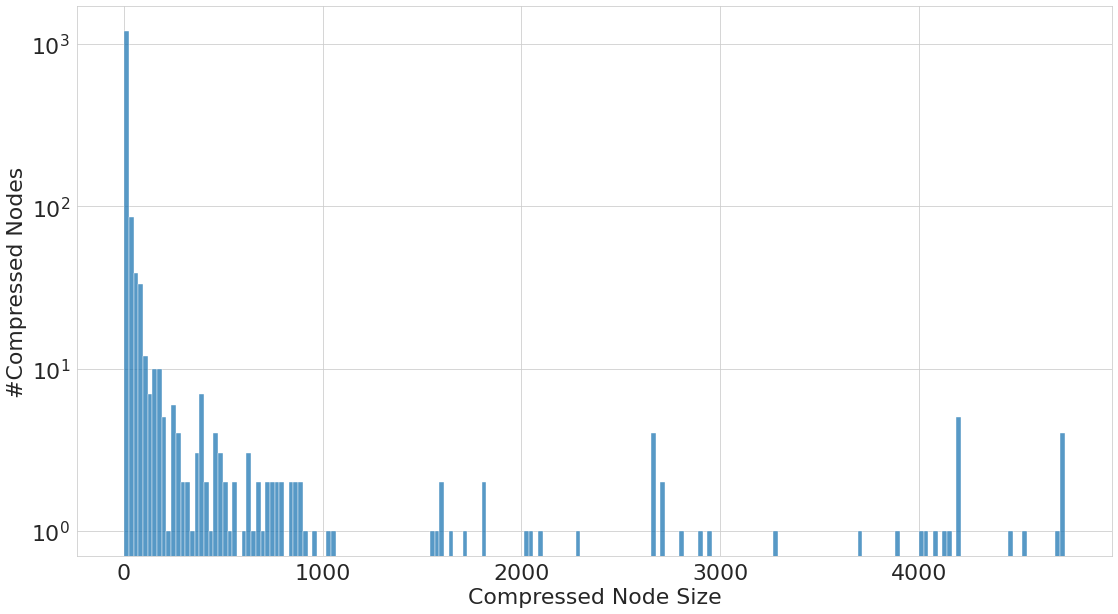

In [96]:
ax = sns.histplot(data=df_compressed, x='size', bins=200)
ax.set(xlabel='Compressed Node Size', ylabel='#Compressed Nodes', yscale='log')
plt.tight_layout()
plt.savefig('figures/node_compression/compressed_node_size_histogram.svg')

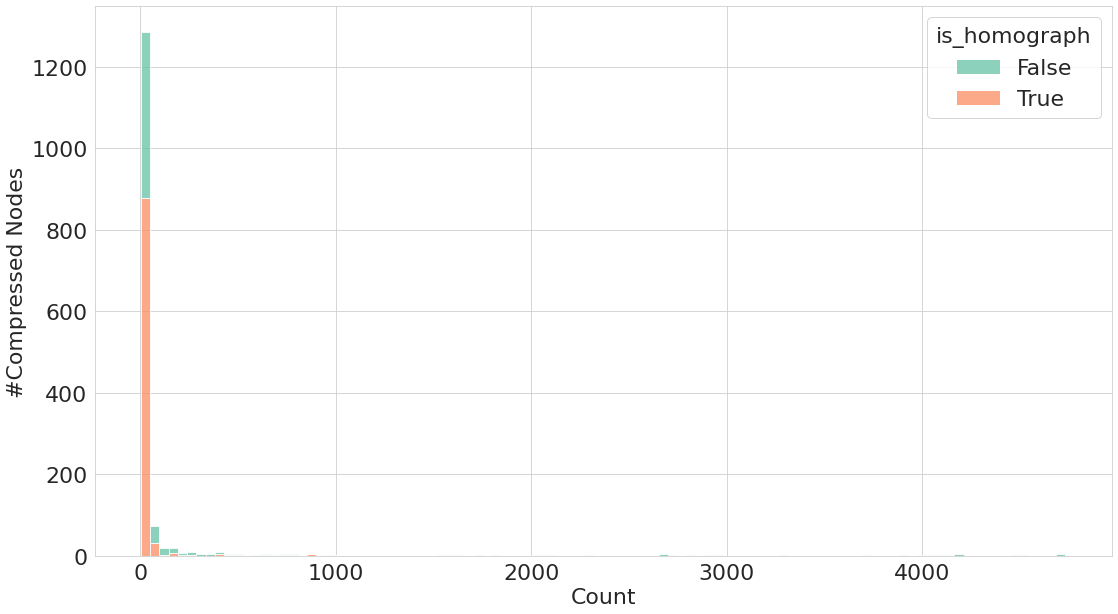

In [97]:
ax = sns.histplot(data=df_compressed, x='size', hue='is_homograph', bins=100, palette='Set2', multiple="stack")
ax.set(xlabel='Count', ylabel='#Compressed Nodes')
plt.tight_layout()

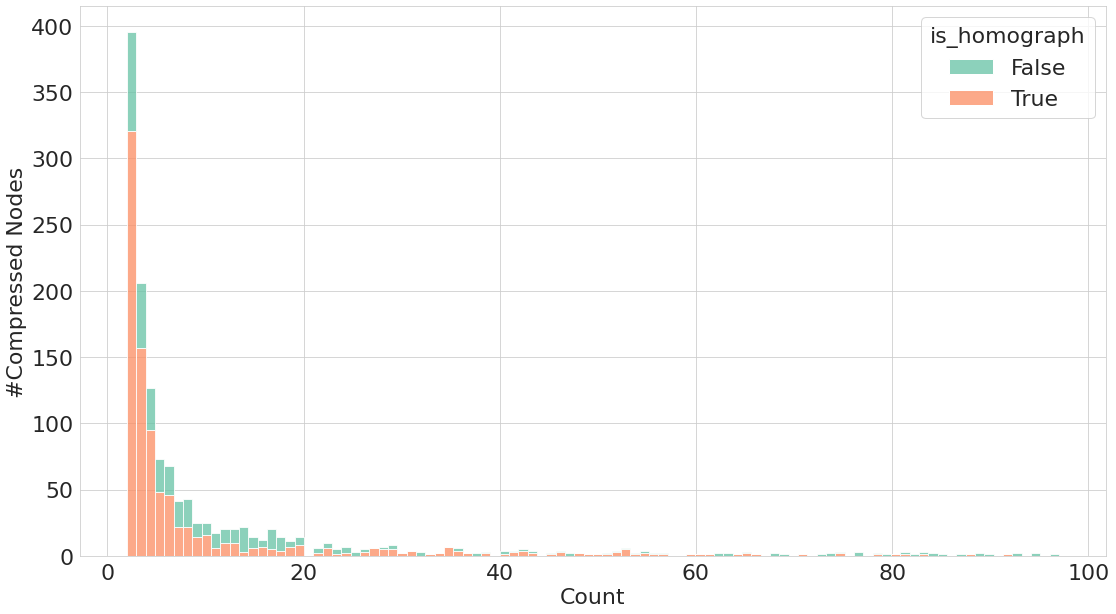

In [98]:
ax = sns.histplot(data=df_compressed[df_compressed['size']<100], x='size', hue='is_homograph', bins=100, palette='Set2', multiple="stack")
ax.set(xlabel='Count', ylabel='#Compressed Nodes')
plt.tight_layout()

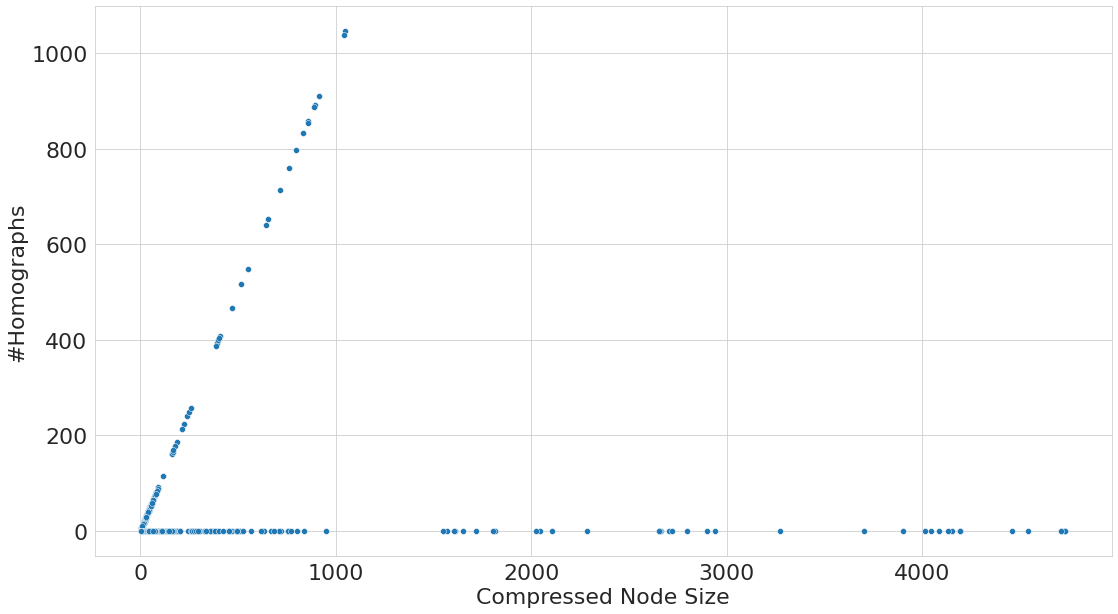

In [99]:
ax = sns.scatterplot(data=df_compressed, x='size', y='num_homographs')
ax.set(xlabel='Compressed Node Size', ylabel='#Homographs',)
plt.tight_layout()